In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from cellpose import models
from csbdeep.utils import normalize
from glob import glob
from skimage import io
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [6]:
image_dir = '/storage/annajiwons/images'
merfish_dir = f'{image_dir}/u2os_cellpose'

model_dir = './models'

In [9]:
# 8 images (20%) chosen for test
X_test_names = sorted(glob(f'{merfish_dir}/test/*[0-9].tif'))
X_test = list(map(io.imread, X_test_names))
Y_test_names = sorted(glob(f'{merfish_dir}/test/*_mask.tif'))
Y_test = list(map(io.imread, Y_test_names))

In [12]:
# Load from disk
cellpose_model = models.CellposeModel(pretrained_model = './models/cellpose_residual_on_style_on_concatenation_off_models_2021_04_03_02_40_20.834557')

parsing model string to get cellpose options
>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **


In [16]:
masks, flows, _ = cellpose_model.eval(X_test, batch_size = 16, channels = [0,0])

  0%|          | 0/8 [00:00<?, ?it/s]/home/annajiwons/.conda/envs/merfish_seg/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/annajiwons/.conda/envs/merfish_seg/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 8/8 [06:28<00:00, 48.56s/it]

time spent: running network 331.85s; flow+mask computation 56.38


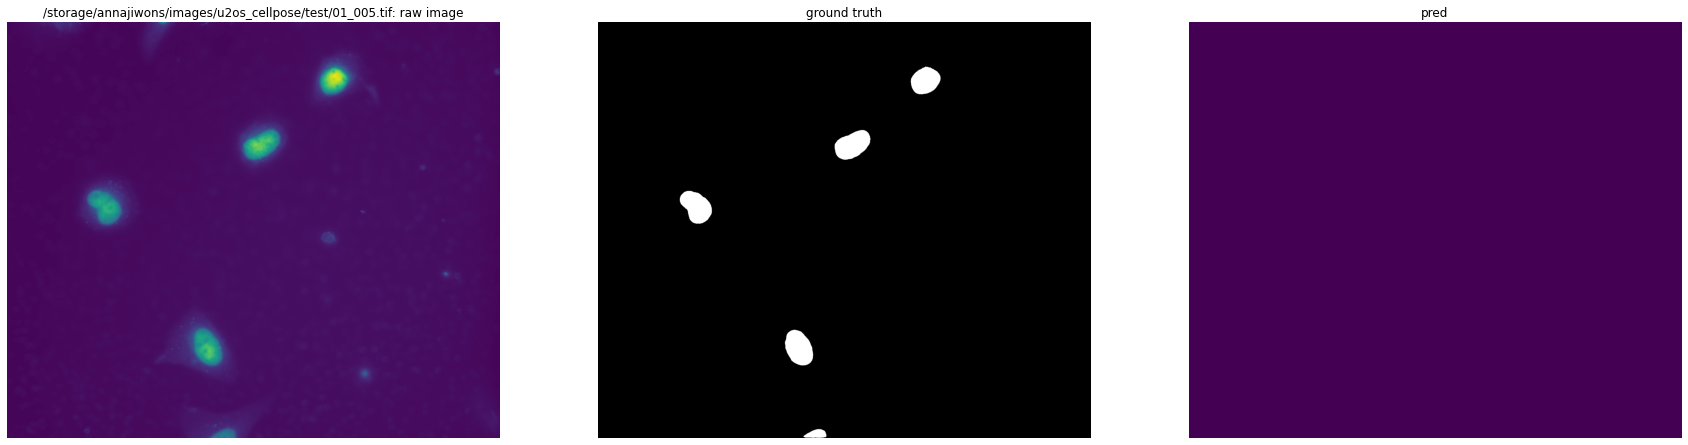

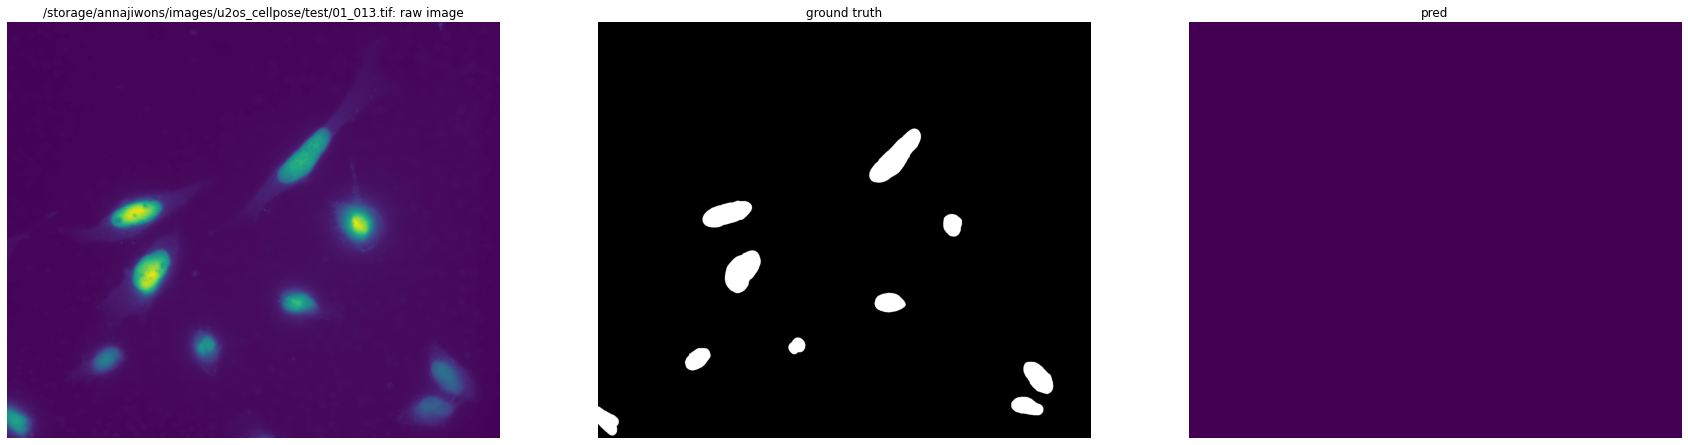

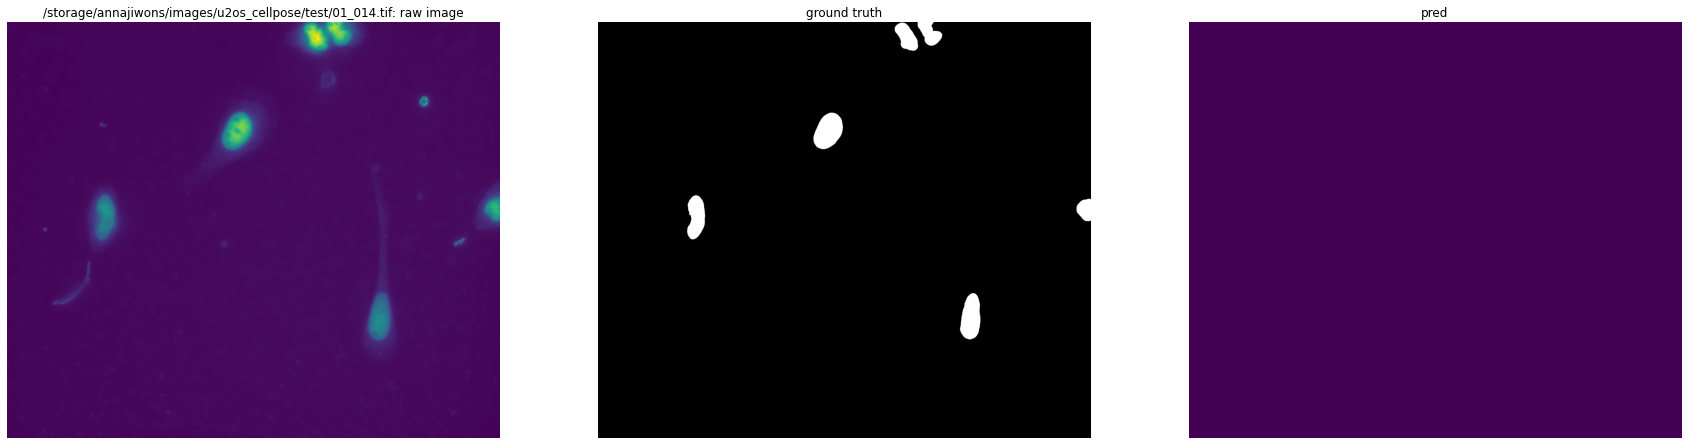

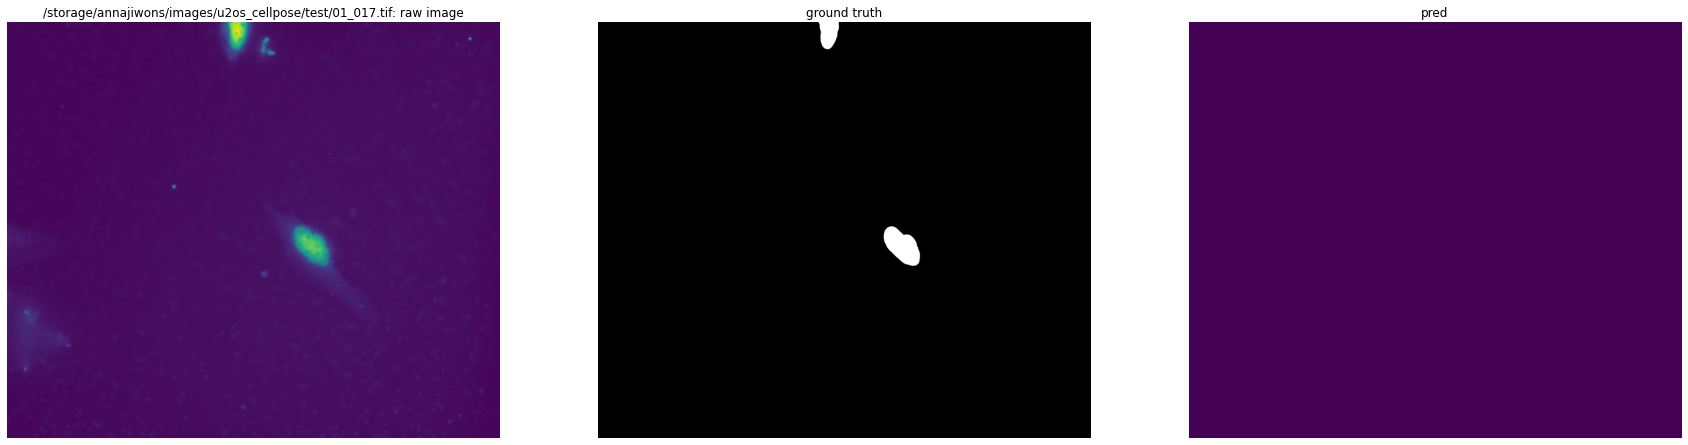

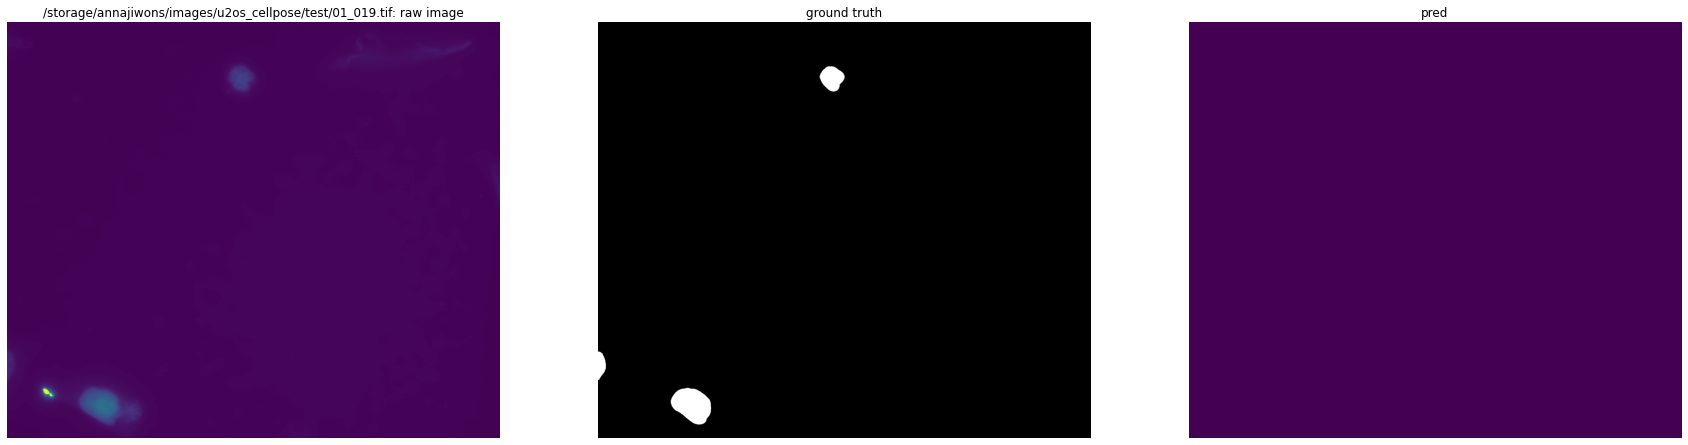

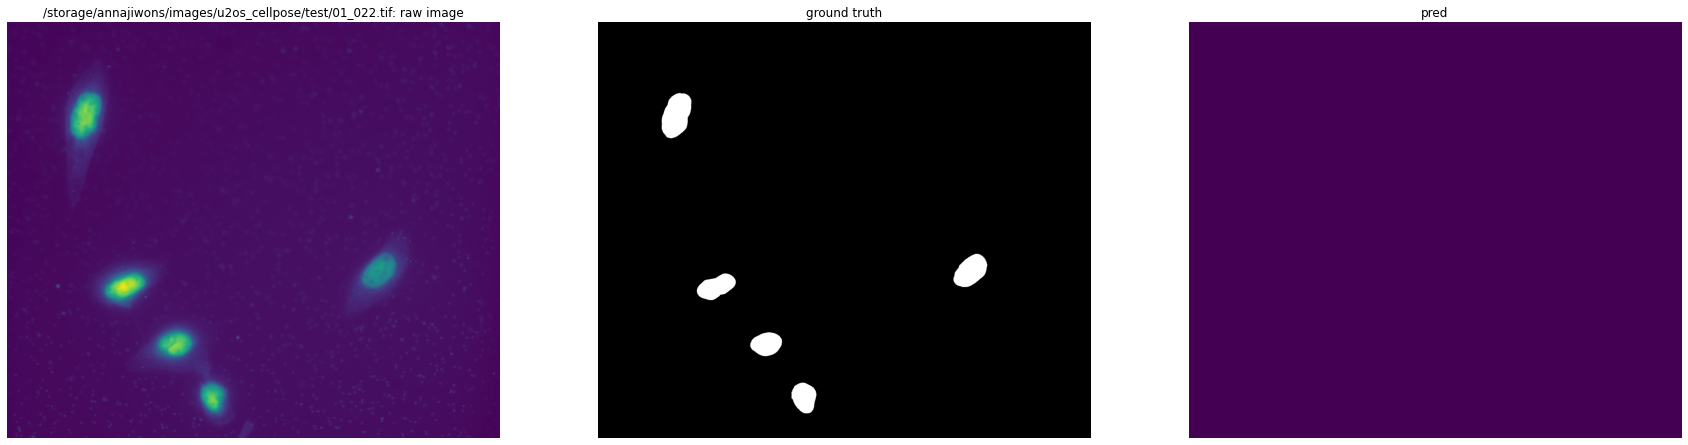

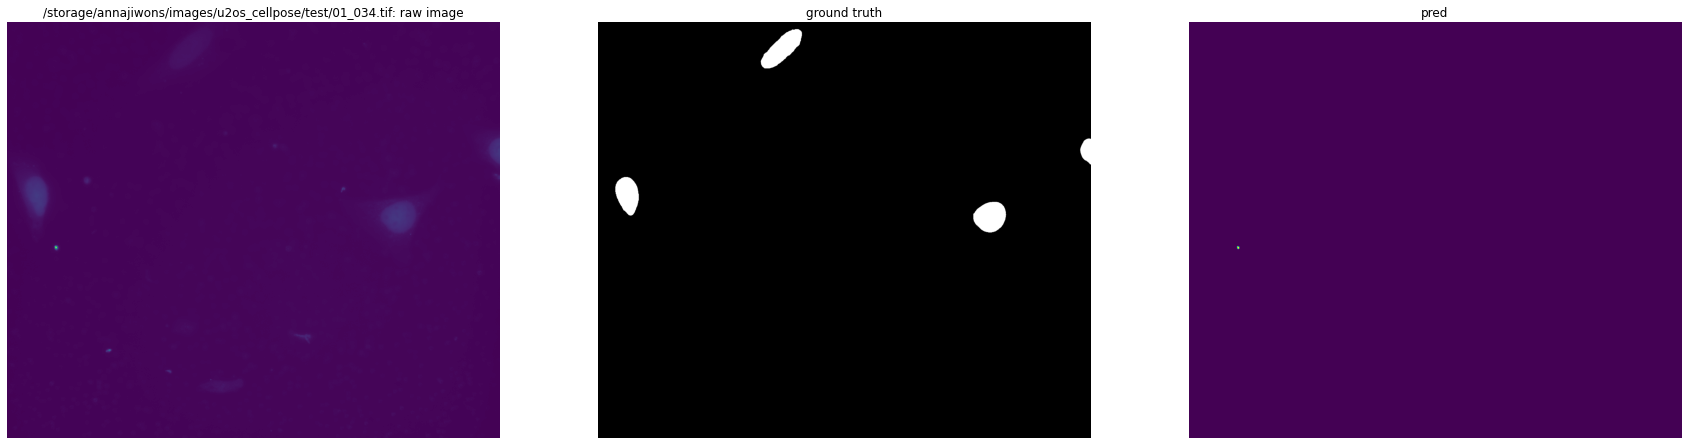

In [ ]:
for i in range(len(masks)):
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))
    axes[0].imshow(X_test[i])
    axes[0].set_title(f'{X_test_names[i]}: raw image')
    axes[0].axis('off')
    
    axes[1].imshow(Y_test[i], clim=(0,1), cmap='gray')
    axes[1].set_title(f'ground truth')
    axes[1].axis('off')
    
    axes[2].imshow(masks[i])
    axes[2].set_title(f'pred')
    axes[2].axis('off')